In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [ ]:
training_df = pd.read_csv("/content/train.csv")
testing_df = pd.read_csv("/content/test.csv")

In [ ]:
training_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Encode all training categorical data to numerical values
label_encoder = LabelEncoder()

for column in training_df.columns:
    if training_df[column].dtype == 'object':
        training_df[column] = label_encoder.fit_transform(training_df[column])

In [ ]:
#Encode all testing categorical data to numerical values
label_encoder = LabelEncoder()

for column in testing_df.columns:
    if testing_df[column].dtype == 'object':
        testing_df[column] = label_encoder.fit_transform(testing_df[column])

In [ ]:
#X_train = train_df[['MSSubClass', 'LotArea', 'LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'YrSold']]
#X_test = test_df[['MSSubClass', 'LotArea', 'LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'YrSold']]

In [ ]:
#X_train.fillna(0, inplace=True)
#X_test.fillna(0, inplace=True)

In [ ]:
#Drop NaN for training dataset and fill NaN for testing dataset
training_df_dropna = training_df.dropna()
testing_df = testing_df.fillna(0)
training_df_dropna

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [ ]:
#Split dataframe to X and y
#Drop 'Id' column for both X and testing
y = training_df_dropna['SalePrice']
X = training_df_dropna.drop('SalePrice', axis=1)
X = X.drop('Id', axis=1)
testing_df = testing_df.drop('Id', axis=1)

In [ ]:
#y_train = train_df['SalePrice']
#c = train_df['MSSubClass']


In [ ]:
#Scale both X and testing
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_actual = scaler.fit_transform(testing_df)

In [ ]:
# #Feature selection: get rid of features that are highly correlated with other features

# # Create a PCA instance
# pca = PCA()

# # Fit the PCA model to the scaled data
# pca.fit(X)

# # Examine the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained Variance Ratios:", explained_variance_ratio)

# # Determine the number of principal components to retain
# cumulative_variance_ratio = explained_variance_ratio.cumsum()
# n_components = (cumulative_variance_ratio >= 0.95).sum() + 1
# print("Number of Components to Retain:", n_components)

# # Transform the data to the reduced dimension
# reduced_data = pca.transform(X)[:, :n_components]

# # Create a new DataFrame with the reduced features
# df_reduced = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X)

# Calculate the cumulative explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain at least 95% of the variance
n_components = (cumulative_variance_ratio >= 0.95).sum() + 1

# Redo PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X)

# Apply the same PCA transformation to the testing dataset
X_test_pca = pca.transform(X_test_actual)

In [ ]:
#Split training to training and validation
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.2, random_state=123)

In [ ]:
#Because of randomising, index are messed up
#X_train_reset = X_train.reset_index(drop=True)
#y_train_reset = y_train.reset_index(drop=True)

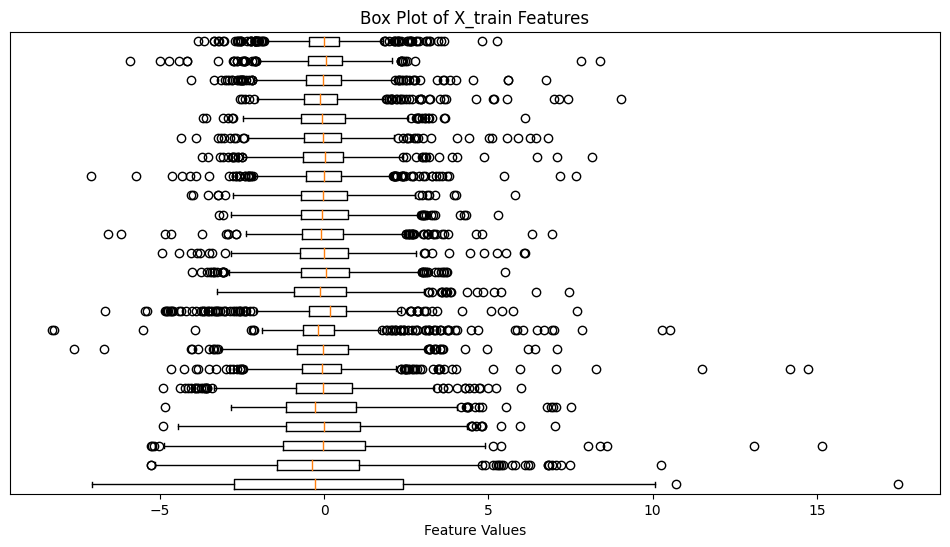

In [ ]:
#Outlier removal: remove datapoints that are far away from the majority of the datapoints
plt.figure(figsize=(12, 6))
plt.boxplot(X_train, vert=False)
plt.title("Box Plot of X_train Features")
plt.xlabel("Feature Values")
plt.yticks([])
plt.show()

In [ ]:
#Outliers lies between < -5 and > 7
mask = (X_train >= -5) & (X_train <= 7)
X_train_filtered = X_train[mask.all(axis=1)]

y_train_filtered = y_train[mask.all(axis=1)]
X_train = X_train_filtered
y_train = y_train_filtered

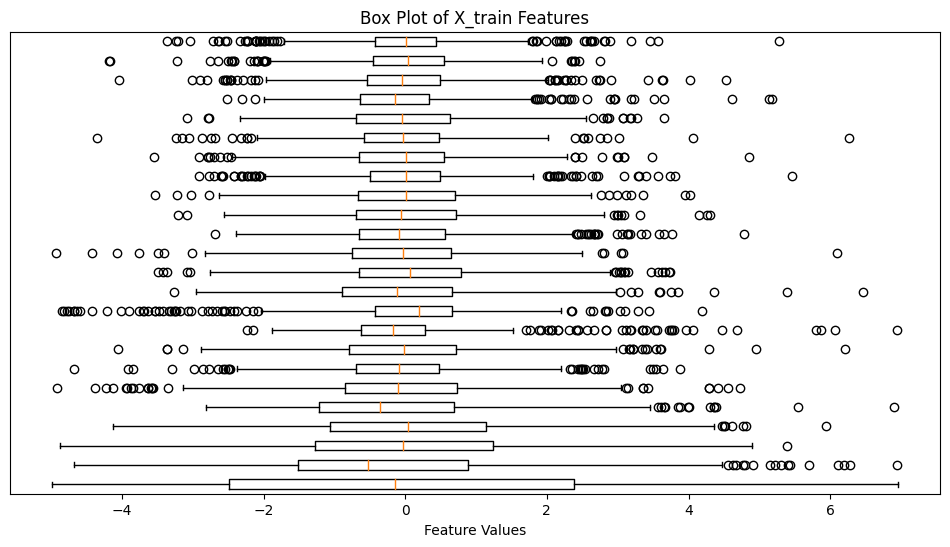

In [ ]:
#Outliers are removed as shown
plt.figure(figsize=(12, 6))
plt.boxplot(X_train, vert=False)
plt.title("Box Plot of X_train Features")
plt.xlabel("Feature Values")
plt.yticks([])
plt.show()

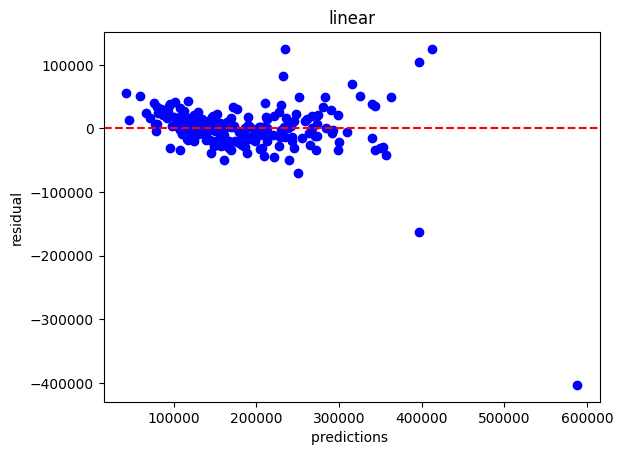

In [ ]:
X = np.array(X_train)
y = np.array(y_train)

model = LinearRegression()

model.fit(X, y)

coef = model.coef_
intercept = model.intercept_

new_data = np.array(X_test)
predictions = model.predict(new_data)
residuals = y_test - predictions

plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('predictions ')
plt.ylabel('residual')
plt.title('linear')
plt.show()


In [ ]:
predictions_lr = model.predict(X_test_pca)

import csv
# Specify the file path for the CSV file
csv_file_path = 'predictions_lr.csv'

# Write the data to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Id', 'SalePrice'])

    # Write the data rows
    for idx, class_num in enumerate(predictions_lr, start=0):
        writer.writerow([idx+1461, class_num])

print(f'CSV file "{csv_file_path}" with {len(predictions_lr)} rows has been created.')

CSV file "predictions_lr.csv" with 1459 rows has been created.


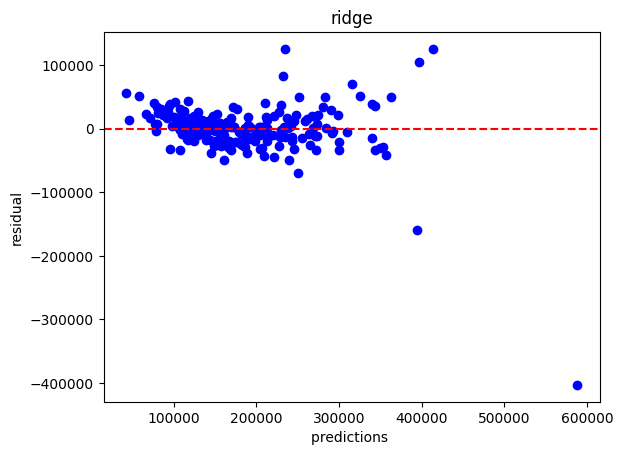

In [ ]:
from sklearn.linear_model import Ridge
X = np.array(X_train)
y = np.array(y_train)

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X, y)

coef = ridge_model.coef_
intercept = ridge_model.intercept_

new_data = np.array(X_test)
predictions = ridge_model.predict(new_data)

residuals = y_test - predictions

plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('predictions ')
plt.ylabel('residual')
plt.title('ridge')
plt.show()


In [ ]:
predictions_rm = ridge_model.predict(X_test_pca)

import csv
# Specify the file path for the CSV file
csv_file_path = 'predictions_rm.csv'

# Write the data to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Id', 'SalePrice'])

    # Write the data rows
    for idx, class_num in enumerate(predictions_rm, start=0):
        writer.writerow([idx+1461, class_num])

print(f'CSV file "{csv_file_path}" with {len(predictions_rm)} rows has been created.')

CSV file "predictions_rm.csv" with 1459 rows has been created.


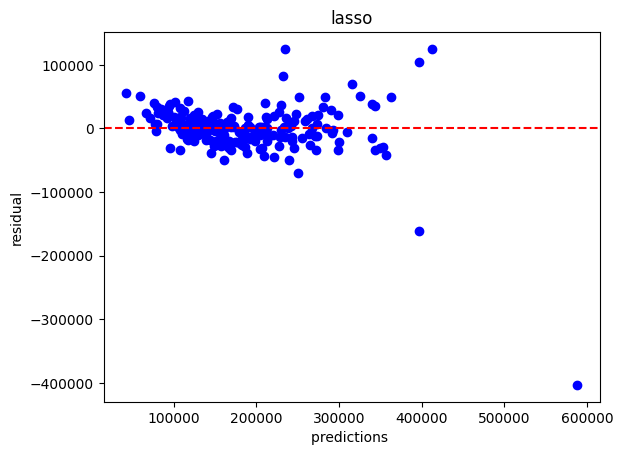

In [ ]:
from sklearn.linear_model import Lasso

X = np.array(X_train)
y = np.array(y_train)

lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X, y)

coef = lasso_model.coef_
intercept = lasso_model.intercept_

new_data = np.array(X_test)
predictions = lasso_model.predict(new_data)

residuals = y_test - predictions

plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('predictions ')
plt.ylabel('residual')
plt.title('lasso')
plt.show()


In [ ]:
predictions_lm = lasso_model.predict(X_test_pca)

import csv
# Specify the file path for the CSV file
csv_file_path = 'predictions_lm.csv'

# Write the data to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Id', 'SalePrice'])

    # Write the data rows
    for idx, class_num in enumerate(predictions_lm, start=0):
        writer.writerow([idx+1461, class_num])

print(f'CSV file "{csv_file_path}" with {len(predictions_lm)} rows has been created.')

CSV file "predictions_lm.csv" with 1459 rows has been created.


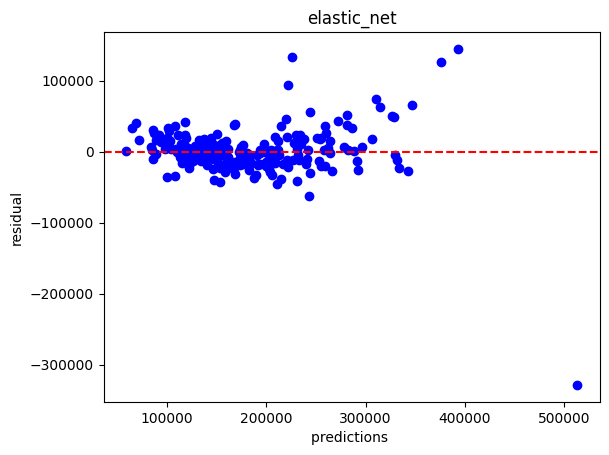

In [ ]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

X = np.array(X_train)
y = np.array(y_train)

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

elastic_net_model.fit(X, y)

coef = elastic_net_model.coef_
intercept = elastic_net_model.intercept_

new_data = np.array(X_test)
predictions = elastic_net_model.predict(new_data)

residuals = y_test - predictions

plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('predictions ')
plt.ylabel('residual')
plt.title('elastic_net')
plt.show()




In [ ]:
predictions_en = elastic_net_model.predict(X_test_pca)

import csv
# Specify the file path for the CSV file
csv_file_path = 'predictions_en.csv'

# Write the data to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Id', 'SalePrice'])

    # Write the data rows
    for idx, class_num in enumerate(predictions_en, start=0):
        writer.writerow([idx+1461, class_num])

print(f'CSV file "{csv_file_path}" with {len(predictions_en)} rows has been created.')

CSV file "predictions_en.csv" with 1459 rows has been created.


XGBoost by Sam

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
# from sklearn.datasets import load_boston  # Example dataset (you can replace this with your dataset)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score  # Depending on your task

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=2000, learning_rate=0.01, max_depth=3, random_state=123) #For regression

In [ ]:
# classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42, labels=[0,1]) #For classification

In [ ]:
# model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=3,objective='binary:logistic')
# model.fit(X_train, y_train)

In [ ]:
regressor.fit(X_train, y_train)  # For regression


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
#classifier.fit(X_train, y_train)  # For classification

In [ ]:
y_pred = regressor.predict(X_test)  # For regression
#y_pred = classifier.predict(X_test)  # For classification

In [ ]:
y_pred_pca = regressor.predict(X_test_pca)  # For regression

In [ ]:
print(y_pred_pca.shape)

(1459,)


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R^2): {r2}")

Mean Squared Error: 31838.157966517454
Root Mean Squared Error: 178.43250255073332
R-squared (R^2): 0.8249325760408779


In [ ]:
import csv
# Specify the file path for the CSV file
csv_file_path = 'predictions.csv'

# Write the data to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Id', 'SalePrice'])

    # Write the data rows
    for idx, class_num in enumerate(y_pred_pca, start=0):
        writer.writerow([idx+1461, class_num])

print(f'CSV file "{csv_file_path}" with {len(y_pred_pca)} rows has been created.')

CSV file "predictions.csv" with 1459 rows has been created.
